In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 65.4 MB/s eta 0:00:00


In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

# Combine Plot


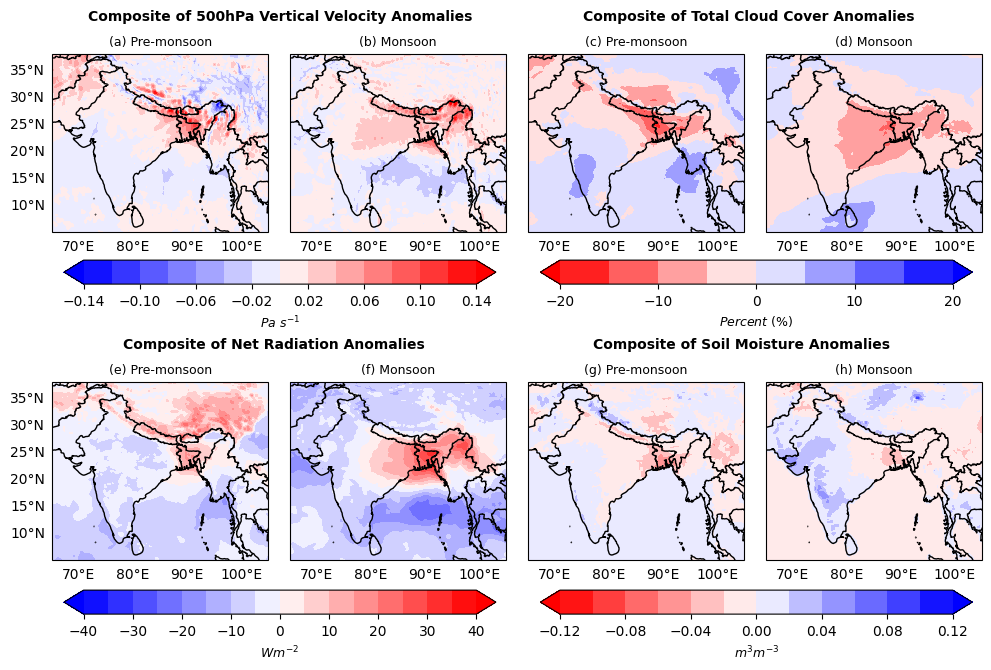

In [ ]:
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(nrows=2,ncols=4,subplot_kw={'projection':projection},figsize=(12, 12))

#vv
levels_vv=np.arange(-0.14,0.14+0.01,0.02)
#mam
ax=axes[0,0]
vv=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/vertical_velocity/data/vv_events_anom-mam.nc')

vv=vv.mean(dim='event_no',skipna=True)

lat_range=slice(38,5)
lon_range=slice(65,105)
vv=vv.sel(latitude=lat_range,longitude=lon_range)

latitude=vv['latitude'].values
longitude=vv['longitude'].values
contourf=ax.contourf(longitude,latitude,vv.w,levels=levels_vv,cmap='bwr',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(a) Pre-monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['left','bottom'],visible=False)

#jjas
ax=axes[0,1]
vv=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/vertical_velocity/data/vv_events_anom-jjas.nc')

vv=vv.mean(dim='event_no',skipna=True)
vv=vv.sel(latitude=lat_range,longitude=lon_range)

latitude=vv['latitude'].values
longitude=vv['longitude'].values
contourf=ax.contourf(longitude,latitude,vv.w,levels=levels_vv,cmap='bwr',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(b) Monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['bottom'],visible=False)

# # contour levels
cbar = plt.colorbar(contourf, ax=axes[0,0:2], orientation='horizontal', pad=0.01, fraction=0.12, shrink= 1, aspect=18, label="${Pa}\ {s}^{-1}$")
cbar.set_label("${Pa}\ {s}^{-1}$", fontsize=9)
cbar.set_ticks(levels_vv[::2])  # Set the colorbar ticks
cbar.ax.set_position([0.015, 0.34, 0.6, 0.02]) # [left, bottom, width, height]
fig.text(0.315, 0.56, "Composite of 500hPa Vertical Velocity Anomalies", ha='center', fontsize=10, fontweight='bold')


#tcc
levels_tcc=np.arange(-20,20+0.01,5)

#mam
ax=axes[0,2]
tcc=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/tcc/data/tcc_events_anom-mam.nc')

tcc=tcc.mean(dim='event_no',skipna=True)

lat_range=slice(38,5)
lon_range=slice(65,105)
tcc=tcc.sel(latitude=lat_range,longitude=lon_range)

latitude=tcc['latitude'].values
longitude=tcc['longitude'].values
contourf=ax.contourf(longitude,latitude,tcc.tcc*100,levels=levels_tcc,extend='both',cmap='bwr_r',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(c) Pre-monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['bottom'],visible=False)

#jjas
ax=axes[0,3]
tcc=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/tcc/data/tcc_events_anom-jjas.nc')

tcc=tcc.mean(dim='event_no',skipna=True)

lat_range=slice(38,5)
lon_range=slice(65,105)
tcc=tcc.sel(latitude=lat_range,longitude=lon_range)

latitude=tcc['latitude'].values
longitude=tcc['longitude'].values
contourf=ax.contourf(longitude,latitude,tcc.tcc*100,levels=levels_tcc,extend='both',cmap='bwr_r',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(d) Monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['bottom'],visible=False)

# # contour levels
cbar = plt.colorbar(contourf, ax=axes[0,2:4], orientation='horizontal', pad=0.01, fraction=0.12, shrink= 1, aspect=18, label="${Percent}\ {(\%)}$")
cbar.set_label("${Percent}\ {(\%)}$", fontsize=9)
cbar.set_ticks(levels_tcc[::2])  # Set the colorbar ticks
cbar.ax.set_position([0.412, 0.34, 0.6, 0.02]) # [left, bottom, width, height]
fig.text(0.706, 0.56, "Composite of Total Cloud Cover Anomalies", ha='center', fontsize=10, fontweight='bold')

# nr
levels_nr=np.arange(-40,40+1,5)

#mam
ax=axes[1,0]
nr=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/net_radiation/data/nr_events_anom-mam.nc')
nr=nr.mean(dim='event_no',skipna=True)
lat_range=slice(38,5)
lon_range=slice(65,105)
nr=nr.sel(latitude=lat_range,longitude=lon_range)

latitude=nr['latitude'].values
longitude=nr['longitude'].values
contourf=ax.contourf(longitude,latitude,nr['net radiation'],levels=levels_nr,extend='both',cmap='bwr',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(e) Pre-monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['left','bottom'],visible=False)


#jjas
ax=axes[1,1]
nr=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/net_radiation/data/nr_events_anom-jjas.nc')
nr=nr.mean(dim='event_no',skipna=True)
nr=nr.sel(latitude=lat_range,longitude=lon_range)

latitude=nr['latitude'].values
longitude=nr['longitude'].values



contourf=ax.contourf(longitude,latitude,nr['net radiation'],levels=levels_nr,extend='both',cmap='bwr',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${W} {m}^{-2}$")

ax.coastlines()
ax.set_title("(f) Monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['bottom'],visible=False)

# # contour levels
cbar = plt.colorbar(contourf, ax=axes[1,0:2], orientation='horizontal', pad=0.01, fraction=0.12, shrink= 1, aspect=18, label="${W} {m}^{-2}$")
cbar.set_label("${W} {m}^{-2}$", fontsize=9)
cbar.set_ticks(levels_nr[::2])  # Set the colorbar ticks
cbar.ax.set_position([0.015, 0.065, 0.6, 0.02]) # [left, bottom, width, height]
fig.text(0.31, 0.287, "Composite of Net Radiation Anomalies", ha='center', fontsize=10, fontweight='bold')

#sm
levels_sm=np.arange(-0.12, 0.12 + 0.01, 0.02)

#mam
ax=axes[1,2]
sm=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/soil moisture/data/sm_events_anom-mam.nc')
lat_range=slice(38,5)
lon_range=slice(65,105)
sm=sm.sel(latitude=lat_range,longitude=lon_range)
sm_anom=sm.mean(dim='event_no',skipna=True)

latitude_sm=sm_anom['latitude'].values
longitude_sm=sm_anom['longitude'].values
contourf=ax.contourf(longitude_sm,latitude_sm,sm_anom.swvl1,levels=levels_sm,cmap='bwr_r',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['bottom'],visible=False)
ax.coastlines()
ax.set_title("(g) Pre-monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))


#jjas
ax=axes[1,3]
sm=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/soil moisture/data/sm_events_anom-jjas.nc')
lat_range=slice(38,5)
lon_range=slice(65,105)
sm=sm.sel(latitude=lat_range,longitude=lon_range)
sm_anom=sm.mean(dim='event_no',skipna=True)

latitude_sm=sm_anom['latitude'].values
longitude_sm=sm_anom['longitude'].values
contourf=ax.contourf(longitude_sm,latitude_sm,sm_anom.swvl1,levels=levels_sm,cmap='bwr_r',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['bottom'],visible=False)
ax.coastlines()
ax.set_title("(h) Monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))

# # contour levels
cbar = plt.colorbar(contourf, ax=axes[1,2:4], orientation='horizontal', pad=0.02, fraction=0.12, shrink= 1, aspect=18)
cbar.set_label("${m}^{3} {m}^{-3}$", fontsize=9)
cbar.set_ticks(levels_sm[::2])  # Set the colorbar ticks
cbar.ax.set_position([0.412, 0.065, 0.6, 0.02]) # [left, bottom, width, height]
fig.text(0.7, 0.287, "Composite of Soil Moisture Anomalies", ha='center', fontsize=10, fontweight='bold')

plt.subplots_adjust( wspace= 0.1 ,hspace=-0.45)
plt.show()